In [94]:
import os
print(os.getcwd())


/workspaces/taller/session-01/notebooks


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:

df = pd.read_csv('../../datos/Base_Taller.csv',sep= ';')
df.head()

,Zona,Sede,Año,Mes,Ingresos,Costo_mat_prima,Costo_M.Obra,Utilidad_Bruta,Mg_Bruto,Gastos_operativos,Gastos_personal,Ut_Operacional,Mg_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Ejecutadas,Capac_Hrs
0,Zona Antioquia,Medellín Alistamiento,2021,ene,130985262,24585616,51162101,55237545,"0,42",13907989,9061363,32268193,"0,25",0,11,297,725,1120
1,Zona Antioquia,Medellín Alistamiento,2021,feb,153990095,21756687,39088742,93144666,"0,60",10265877,5423510,77455278,"0,50",1,10,342,924,960
2,Zona Antioquia,Medellín Alistamiento,2021,mar,202392276,36939018,45901516,119551741,"0,59",9733295,7306372,102512074,"0,51",1,10,592,1084,960
3,Zona Antioquia,Medellín Alistamiento,2021,abr,143886122,32593098,39657415,71635608,"0,50",4947858,4225194,62462556,"0,43",1,10,426,752,960
4,Zona Antioquia,Medellín Alistamiento,2021,may,110708724,25521746,38377297,46809682,"0,42",9857018,4218552,32734111,"0,30",1,10,297,544,960


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Zona               2427 non-null   object
 1   Sede               2427 non-null   object
 2   Año                2427 non-null   int64 
 3   Mes                2427 non-null   object
 4   Ingresos           2427 non-null   int64 
 5   Costo_mat_prima    2427 non-null   int64 
 6   Costo_M.Obra       2427 non-null   int64 
 7   Utilidad_Bruta     2427 non-null   int64 
 8   Mg_Bruto           2427 non-null   object
 9   Gastos_operativos  2427 non-null   int64 
 10  Gastos_personal    2427 non-null   int64 
 11  Ut_Operacional     2427 non-null   int64 
 12  Mg_Operacional     2427 non-null   object
 13  Empl_Admon         2427 non-null   int64 
 14  Empl_Operativo     2427 non-null   int64 
 15  Ordenes            2427 non-null   int64 
 16  Hrs_Ejecutadas     2427 non-null   int64 


In [98]:
df.describe(include='all')

,Zona,Sede,Año,Mes,Ingresos,Costo_mat_prima,Costo_M.Obra,Utilidad_Bruta,Mg_Bruto,Gastos_operativos,Gastos_personal,Ut_Operacional,Mg_Operacional,Empl_Admon,Empl_Operativo,Ordenes,Hrs_Ejecutadas,Capac_Hrs
count,2427,2427,2427.000000,2427,2.427000e+03,2.427000e+03,2.427000e+03,2.427000e+03,2427,2.427000e+03,2.427000e+03,2.427000e+03,2427,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000
unique,5,52,NaN,12,NaN,NaN,NaN,NaN,125,NaN,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN
top,Zonas Secundarias,Medellín Alistamiento,NaN,dic,NaN,NaN,NaN,NaN,"0,53",NaN,NaN,NaN,"0,15",NaN,NaN,NaN,NaN,NaN
freq,824,48,NaN,204,NaN,NaN,NaN,NaN,109,NaN,NaN,NaN,69,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2022.513391,NaN,2.392135e+08,5.186152e+07,6.963180e+07,1.177202e+08,NaN,5.355092e+07,3.898585e+07,2.518342e+07,NaN,7.021014,12.903173,355.839720,1542.825711,1791.953028
std,NaN,NaN,1.120210,NaN,1.974795e+08,4.534691e+07,7.367127e+07,1.012535e+08,NaN,4.132847e+07,3.643601e+07,5.704818e+07,NaN,6.295614,10.941278,249.276136,1542.107381,1556.065644
min,NaN,NaN,2021.000000,NaN,0.000000e+00,-3.958391e+08,-7.306228e+07,-7.290449e+07,NaN,-8.120832e+07,-2.881942e+07,-2.830368e+08,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2022.000000,NaN,9.743527e+07,1.827553e+07,2.372786e+07,4.327737e+07,NaN,2.521167e+07,1.502443e+07,-3.573992e+06,NaN,3.000000,6.000000,159.500000,628.000000,750.000000
50%,NaN,NaN,2023.000000,NaN,1.929036e+08,4.204138e+07,4.969848e+07,9.732852e+07,NaN,4.498698e+07,2.996730e+07,1.559276e+07,NaN,5.000000,10.000000,327.000000,1179.000000,1440.000000
75%,NaN,NaN,2024.000000,NaN,3.104789e+08,7.070617e+07,8.025845e+07,1.596521e+08,NaN,7.078010e+07,4.956032e+07,4.485727e+07,NaN,9.000000,15.000000,480.000000,1841.500000,2150.000000


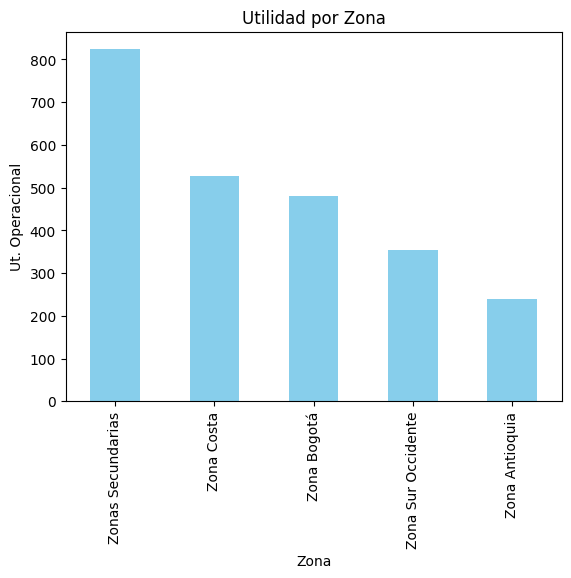

In [99]:
df['Zona'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Utilidad por Zona')
plt.xlabel('Zona')
plt.ylabel('Ut. Operacional')
plt.show()

*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

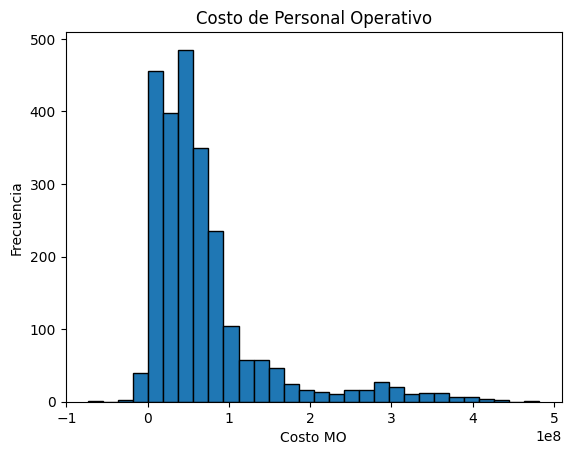

In [100]:
df['Costo_M.Obra'].dropna().plot(kind='hist', bins=30, edgecolor='Black')
plt.title('Costo de Personal Operativo')
plt.xlabel('Costo MO')
plt.ylabel('Frecuencia')
plt.show()

*Interpretación: El histograma muestra la frecuencia del rango de costo de mano de obra. Los datos atípicos corresponden a los costos de sedes grandes cuya operación es mas robusta que las del promedio nacional*

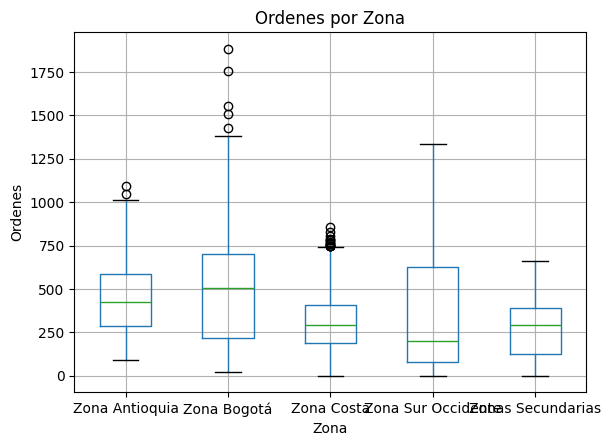

In [101]:
df.boxplot(column='Ordenes', by='Zona')
plt.title('Ordenes por Zona')
plt.suptitle('')
plt.xlabel('Zona')
plt.ylabel('Ordenes')
plt.show()

*Interpretación: El boxplot permite comparar la distribución del ingreso entre grupos de género, y detectar posibles outliers.*